In [1]:
import cv2
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('img.jpg')

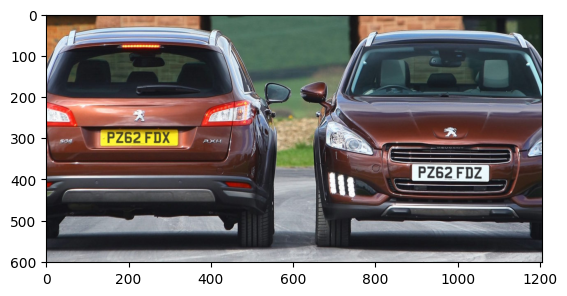

In [10]:
plt.imshow(img[:,:,::-1])

In [11]:
plate_cascade= cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [14]:
def detectplate(img):
    if len(img.shape)!=2:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 5)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w,y+h),(0,0,255),10)
    plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_RGB2GRAY)
    return plate_img, plate_gray

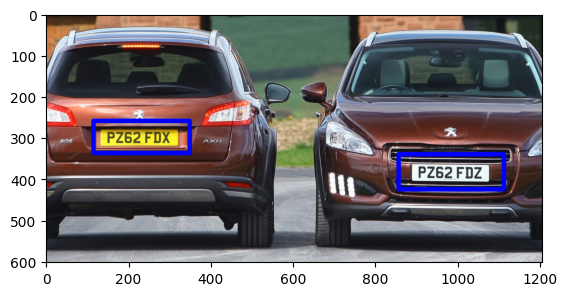

In [15]:
result, gray = detectplate(img)
plt.imshow(result)

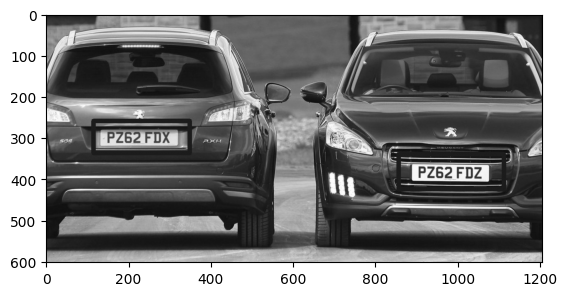

In [16]:
plt.imshow(gray, cmap = 'gray')

In [17]:
def blurring(img):
    if len(img.shape)!=2:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 5)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w,y+h),(255,255,0),10)
        plate = plate_img[y: y+h, x: x+w]
        blurred_plate = cv2.GaussianBlur(plate, (25,25), 0)
        plate_img[y: y+h, x: x+w] = blurred_plate
    plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_RGB2GRAY)
    return plate_img,plate_gray

In [18]:
res1,res2=blurring(image)

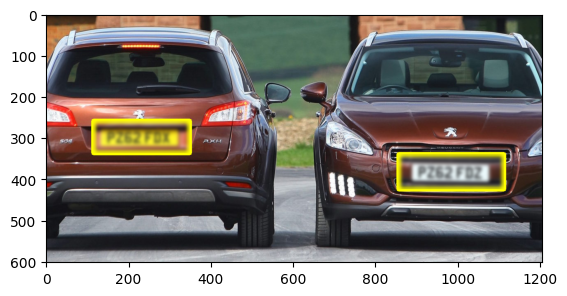

In [19]:
plt.imshow(res1)

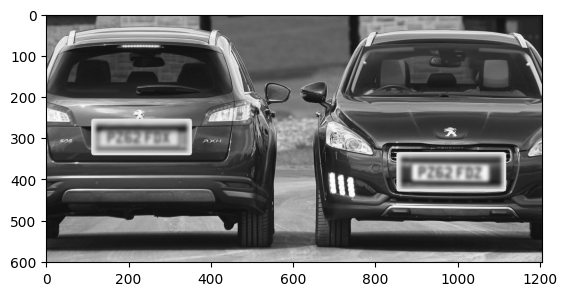

In [20]:
plt.imshow(res2,cmap='grey')